# Time Period Of A Pendulum
George Poole grp39@cam.ac.uk

A pendulum consisting of a point mass attached to the end of a string of length $\ell$ making an angle $\theta$ to the vertical obeys the equation of motion

$$\ddot{\theta}+\frac{g}{\ell}\sin\theta=0~~~.$$

For small $\theta$, the approximation $\sin\theta\approx\theta$ is often made, with yields a solution

$$\theta(t)\approx\alpha\cos(\sqrt{g/\ell}t)$$

with initial conditions $\theta(0)=\alpha$ and $\dot{\theta}(0)=0$, which gives a time period

$$T\approx2\pi\sqrt{\frac{\ell}{g}}~~~.$$

But we want to do better than this. First note that 

$$\ddot{\theta}=\frac{\text{d}\dot{\theta}}{\text{d}t}=\dot{\theta}\frac{\text{d}\dot{\theta}}{\text{d}\theta}$$

which allows us to integrate the equation of motion with respect to $\theta$. Writing $\omega^2=g/\ell$,

$$\int_0^{\dot{\theta}}\dot{\theta}'~\text{d}\dot{\theta}'=-\omega^2\int_{\alpha}^\theta\sin\theta'~\text{d}\theta'$$

$$\dot{\theta}^2=2\omega^2(\cos\theta-\cos\alpha)$$

$$\int_{\alpha}^{\theta(t)}\frac{\text{d}\theta'}{\sqrt{\cos\theta'-\cos\alpha}}=\pm\sqrt{2}\omega\int_0^t~\text{d}t'$$

A quarter of the period is spent going from $\theta=\theta_0$ to $\theta=0$, so taking the negative root gives

$$\tfrac{\sqrt{2}}{4}\omega T=\int_0^{\alpha}\frac{\text{d}\theta}{\sqrt{\cos\theta-\cos\alpha}}$$

which is admittedly a difficult looking integral. Let's use the trigonometric identity 

$$\cos\theta=1-2\sin^2(\theta/2)$$

to obtain

$$\tfrac{1}{2}\omega T=\int_0^{\alpha}\frac{\text{d}\theta}{\sqrt{\sin^2(\alpha/2)-\sin^2(\theta/2)}}$$

and then make the substitution

$$\sin({\theta}/2)=\sin({\alpha}/2)\sin\phi$$

to get

$$\tfrac{1}{4}\omega T=\int_0^{\pi/2}\frac{\text{d}\phi}{\sqrt{1-\sin^2({\alpha}/2)\sin^2\phi}}~~~.$$

We can something useful with the integrand since $\sin^2({\alpha}/2)\sin^2\phi<1$ in the interval of integration $0<\phi<\pi/2$ provided that $|\theta_0|<\pi$. Writing $\Phi=\sin({\alpha}/2)\sin\phi$, a binomial expansion gives

$$(1-\Phi^2)^{-1/2}=1+\tfrac{1}{2}\Phi^2+\tfrac{3}{8}\Phi^4+\dots+\frac{(2k-1)!!}{2^kk!}\Phi^{2k}+\dots$$

where the expression for the $k^{\text{th}}$ term holds for $k\geq1$. So we now just need to integrate powers of $\sin\phi$ to determine $T$.

$$\tfrac{1}{4}\omega T=\int_0^{\pi/2}\bigg[1+\sum_{k=1}^{\infty}\frac{(2k-1)!!}{2^kk!}\sin^{2k}(\alpha/2)\sin^{2k}\phi\bigg]~\text{d}\theta$$

$$\omega T=2\pi+4\sum_{k=1}^{\infty}\frac{(2k-1)!!}{2^kk!}\sin^{2k}(\alpha/2)\int_0^{\pi/2}\sin^{2k}\phi~\text{d}\theta$$

Neglecting the series simply obtains our previous approximation $T\approx2\pi/\omega$. Let's now investigate how trunctating the series affects the computed values of $T$.

$$\frac{\omega T}{2\pi}\approx f_{\alpha,N}=1+\frac{2}{\pi}\sum_{k=1}^N\frac{(2k-1)!!}{2^kk!}\sin^{2k}(\alpha/2)\int_0^{\pi/2}\sin^{2k}\phi~\text{d}\theta$$

In [92]:
import numpy as np
import scipy.special as sps
from scipy.integrate import quad

N=20
theta_0=[0.0]*311

for i in range(0,len(theta_0)):
    theta_0[i]=i/100

f=np.array([[1.0]*N]*len(theta_0))

def integral(k):
    func=lambda phi: np.sin(phi)**(2*k)
    return quad(func,0,np.pi/2)[0]

for i in range(0,len(theta_0)):
    for terms in range(1,N+1):
        for k in range(1,terms+1):
            f[i][terms-1]=f[i][terms-1]+(2/np.pi)*sps.factorial2(2*k-1)*np.sin(theta_0[i]/2)**(2*k)*integral(2*k)/(sps.factorial(k)*2**k)      

Taking discrete values $\alpha=i\Delta$ with integer $i\geq0$ and integer $N\geq1$, we can present $f_{\alpha,N}$ as an array of values

$$f(\alpha,N)=
\begin{pmatrix}
f_{0,1} & f_{0,2} & f_{0,3} & \dots \\
f_{\Delta,1} & f_{\Delta,2} & f_{\Delta,3} & \\
f_{2\Delta,1} & f_{2\Delta,2} & f_{2\Delta,3} & \\
\vdots & & & \ddots \\
\end{pmatrix}$$

to be visualised as a heat map, which provides an indication of both the value and convergence of the approximation to the period.

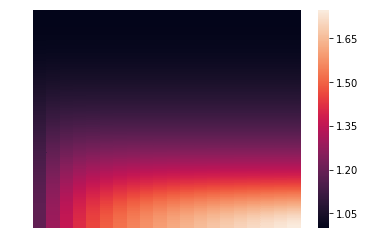

In [94]:
import seaborn as sns
import matplotlib.pylab as plt

fig1=sns.heatmap(f,linewidth=10**(-6))
plt.axis('off')
plt.show()